# 1 : Data import and first inspection 

## imports and configurations

In [1]:
# import the important libraries:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# when we have a lot of columns in df, and we want to present them with df.head() for example
# the pandas will display just some of them, so we want it to allow us to present all of them
# so we change that with MAX_COLUMNS():
pd.options.display.max_columns = 30

#and this one I'll explain later :
pd.options.display.float_format = '{:.2f}'.format

In [6]:
# read the dataset :
# parse_date : converts the date column "release_date" into pandas date type
df = pd.read_csv("C:\Datasets\movies_complete.csv", parse_dates=["release_date"])

In [7]:
# present head of the data:
df.head()

id                        title  \
0    862                    Toy Story   
1   8844                      Jumanji   
2  15602             Grumpier Old Men   
3  31357            Waiting to Exhale   
4  11862  Father of the Bride Part II   

                                             tagline release_date  \
0                                                NaN   1995-10-30   
1          Roll the dice and unleash the excitement!   1995-12-15   
2  Still Yelling. Still Fighting. Still Ready for...   1995-12-22   
3  Friends are the people who let you be yourself...   1995-12-22   
4  Just When His World Is Back To Normal... He's ...   1995-02-10   

                     genres           belongs_to_collection original_language  \
0   Animation|Comedy|Family            Toy Story Collection                en   
1  Adventure|Fantasy|Family                             NaN                en   
2            Romance|Comedy       Grumpy Old Men Collection                en   
3      Comedy|Drama|Romance                             NaN                en   
4                    Comedy  Father of the Bride Collection                en   

   budget_musd  revenue_musd  \
0        30.00        373.55   
1        65.00        262.80   
2          NaN           NaN   
3        16.00         81.45   
4          NaN         76.58   

                                production_companies  \
0                            Pixar Animation Studios   
1  TriStar Pictures|Teitler Film|Interscope Commu...   
2                        Warner Bros.|Lancaster Gate   
3             Twentieth Century Fox Film Corporation   
4          Sandollar Productions|Touchstone Pictures   

       production_countries  vote_count  vote_average  popularity  runtime  \
0  United States of America     5415.00          7.70       21.95    81.00   
1  United States of America     2413.00          6.90       17.02   104.00   
2  United States of America       92.00          6.50       11.71   101.00   
3  United States of America       34.00          6.10        3.86   127.00   
4  United States of America      173.00          5.70        8.39   106.00   

                                            overview  spoken_languages  \
0  Led by Woody, Andy's toys live happily in his ...           English   
1  When siblings Judy and Peter discover an encha...  English|Français   
2  A family wedding reignites the ancient feud be...           English   
3  Cheated on, mistreated and stepped on, the wom...           English   
4  Just when George Banks has recovered from his ...           English   

                                         poster_path  \
0  <img src='http://image.tmdb.org/t/p/w185//uXDf...   
1  <img src='http://image.tmdb.org/t/p/w185//vgpX...   
2  <img src='http://image.tmdb.org/t/p/w185//1FSX...   
3  <img src='http://image.tmdb.org/t/p/w185//4wjG...   
4  <img src='http://image.tmdb.org/t/p/w185//lf9R...   

                                                cast  cast_size  crew_size  \
0  Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...         13        106   
1  Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...         26         16   
2  Walter Matthau|Jack Lemmon|Ann-Margret|Sophia ...          7          4   
3  Whitney Houston|Angela Bassett|Loretta Devine|...         10         10   
4  Steve Martin|Diane Keaton|Martin Short|Kimberl...         12          7   

          director  
0    John Lasseter  
1     Joe Johnston  
2    Howard Deutch  
3  Forest Whitaker  
4    Charles Shyer

## Explore the data

In [8]:
# info about the data :
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44691 entries, 0 to 44690
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     44691 non-null  int64         
 1   title                  44691 non-null  object        
 2   tagline                20284 non-null  object        
 3   release_date           44657 non-null  datetime64[ns]
 4   genres                 42586 non-null  object        
 5   belongs_to_collection  4463 non-null   object        
 6   original_language      44681 non-null  object        
 7   budget_musd            8854 non-null   float64       
 8   revenue_musd           7385 non-null   float64       
 9   production_companies   33356 non-null  object        
 10  production_countries   38835 non-null  object        
 11  vote_count             44691 non-null  float64       
 12  vote_average           42077 non-null  float64       
 13  p

In [9]:
df.genres[1]

'Adventure|Fantasy|Family'

In [10]:
df.cast[1]

'Robin Williams|Jonathan Hyde|Kirsten Dunst|Bradley Pierce|Bonnie Hunt|Bebe Neuwirth|David Alan Grier|Patricia Clarkson|Adam Hann-Byrd|Laura Bell Bundy|James Handy|Gillian Barber|Brandon Obray|Cyrus Thiedeke|Gary Joseph Thorup|Leonard Zola|Lloyd Berry|Malcolm Stewart|Annabel Kershaw|Darryl Henriques|Robyn Driscoll|Peter Bryant|Sarah Gilson|Florica Vlad|June Lion|Brenda Lockmuller'

In [12]:
# here we can see max,min and other improtant values of numeric fields 
# for example max budget was 350M , max cast size es 313 people and so on
df.describe()

id  budget_musd  revenue_musd  vote_count  vote_average  \
count  44691.00      8854.00       7385.00    44691.00      42077.00   
mean  107186.24        21.67         68.97      111.65          6.00   
std   111806.36        34.36        146.61      495.32          1.28   
min        2.00         0.00          0.00        0.00          0.00   
25%    26033.50         2.00          2.41        3.00          5.30   
50%    59110.00         8.20         16.87       10.00          6.10   
75%   154251.00        25.00         67.64       35.00          6.80   
max   469172.00       380.00       2787.97    14075.00         10.00   

       popularity  runtime  cast_size  crew_size  
count    44691.00 43179.00   44691.00   44691.00  
mean         2.96    97.57      12.48      10.31  
std          6.04    34.65      12.12      15.89  
min          0.00     1.00       0.00       0.00  
25%          0.40    86.00       6.00       2.00  
50%          1.15    95.00      10.00       6.00  
75%          3.77   107.00      15.00      12.00  
max        547.49  1256.00     313.00     435.00

<function matplotlib.pyplot.show(close=None, block=None)>

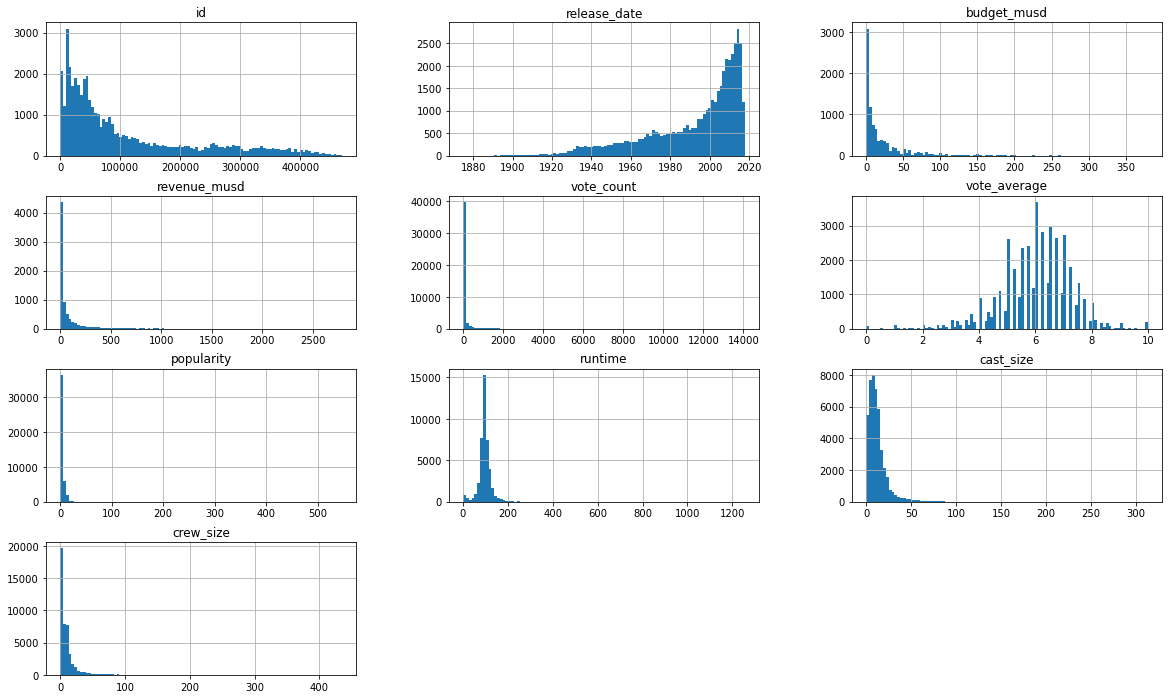

In [14]:
# make histofram about the df so we can visualzie the above values :
# figsize : The size in inches of the figure to create
# bins : Number of histogram bins to be used.
# we can see for example that there are very few movies with cast size > 100.
# we can also see that most of the budgets are betwee 0-50M $.
df.hist(figsize= (20,12), bins=100)
plt.show

## Extract some numbers and facts 

In [16]:
# the most common 20 values in the budget column :
df.budget_musd.value_counts(dropna = False).head(20)
# the most is null with 35K, then 5M with 286 movies

NaN      35837
5.00       286
10.00      258
20.00      243
2.00       241
15.00      226
3.00       220
25.00      206
1.00       195
30.00      189
4.00       180
6.00       173
12.00      171
40.00      166
8.00       155
0.50       141
35.00      141
7.00       137
50.00      124
1.50       119
Name: budget_musd, dtype: int64

In [17]:
# most 20 common revenue values :
df.revenue_musd.value_counts(dropna = False).head(20)

NaN      37306
12.00       20
11.00       19
10.00       19
2.00        18
6.00        17
5.00        14
8.00        13
0.50        13
0.00        12
14.00       12
7.00        11
20.00       10
1.00        10
3.00        10
1.50         9
4.00         9
0.00         9
16.00        8
15.00        8
Name: revenue_musd, dtype: int64

In [18]:
# same thing about average rate :
df.vote_average.value_counts(dropna = False)

NaN     2614
6.00    2421
5.00    1969
7.00    1859
6.50    1705
        ... 
9.40       3
1.10       1
9.80       1
0.70       1
9.60       1
Name: vote_average, Length: 93, dtype: int64

In [19]:
# count of ratings :
df.vote_count.value_counts()
# there are alot of movies with only one rating

1.00       3186
2.00       3056
3.00       2729
0.00       2614
4.00       2442
           ... 
838.00        1
1432.00       1
1825.00       1
4110.00       1
992.00        1
Name: vote_count, Length: 1820, dtype: int64

In [21]:
# and with include object we can et statistics about the numerical data :\
# we can see there is 41605 unique titles from 44691 so we have DUBLICATES!!
# and the most common one is cinderella
df.describe(include = "object")

title                 tagline genres belongs_to_collection  \
count        44691                   20284  42586                  4463   
unique       41605                   20171   4044                  1691   
top     Cinderella  Based on a true story.  Drama       The Bowery Boys   
freq            11                       7   4935                    29   

       original_language       production_companies      production_countries  \
count              44681                      33356                     38835   
unique                89                      22537                      2377   
top                   en  Metro-Goldwyn-Mayer (MGM)  United States of America   
freq               31755                        741                     17723   

                                    overview spoken_languages  \
count                                  43740            41094   
unique                                 43715             1828   
top     Adaptation of the Jane Austen novel.          English   
freq                                       3            22189   

                                              poster_path            cast  \
count                                               44467           42502   
unique                                              44456           42166   
top     <img src='http://image.tmdb.org/t/p/w185//qW1o...  Georges Méliès   
freq                                                    3              24   

         director  
count       43960  
unique      17349  
top     John Ford  
freq           66

In [23]:
# so we make a different df about movies with title cinderella and chek it out :
# and we can see that these are different movies produced in different years
df[df.title == "Cinderella"]

id       title                             tagline release_date  \
984     11224  Cinderella  The greatest love story ever told.   1950-03-04   
12988   42884  Cinderella                                 NaN   1997-11-02   
23254   92349  Cinderella                                 NaN   1914-12-28   
23265  105875  Cinderella          The version children love!   2002-08-06   
28073  261985  Cinderella                                 NaN   2011-10-30   
28340  150689  Cinderella     Midnight is just the beginning.   2015-03-12   
33805   42651  Cinderella                                 NaN   1947-11-28   
35114   44459  Cinderella                                 NaN   1957-03-31   
35116  289673  Cinderella                                 NaN   2000-01-01   
40439  114108  Cinderella                                 NaN   1899-10-01   
44633   98604  Cinderella                                 NaN   2012-02-14   

                                      genres  belongs_to_collection  \
984         Family|Fantasy|Animation|Romance  Cinderella Collection   
12988  TV Movie|Family|Fantasy|Music|Romance                    NaN   
23254                          Fantasy|Drama                    NaN   
23265               Animation|Family|Fantasy                    NaN   
28073                        Family|TV Movie                    NaN   
28340           Romance|Fantasy|Family|Drama                    NaN   
33805                  Comedy|Family|Fantasy                    NaN   
35114                          Drama|Romance                    NaN   
35116                                    NaN                    NaN   
40439  Fantasy|Horror|Science Fiction|Family                    NaN   
44633                         Comedy|Romance                    NaN   

      original_language  budget_musd  revenue_musd  \
984                  en         2.90        263.59   
12988                en          NaN           NaN   
23254                en          NaN           NaN   
23265                en          NaN           NaN   
28073                en          NaN           NaN   
28340                en        95.00        543.51   
33805                ru          NaN           NaN   
35114                en          NaN           NaN   
35116                en          NaN           NaN   
40439                fr          NaN           NaN   
44633                ru          NaN           NaN   

                                    production_companies  \
984           RKO Radio Pictures|Walt Disney Productions   
12988  Walt Disney Television|Citadel Entertainment|S...   
23254                                                NaN   
23265                            GoodTimes Entertainment   
28073  Beta Film|Lux Vide|ARD/Degeto Film GmbH|Rai Fi...   
28340  Walt Disney Pictures|Genre Films|Beagle Pug Fi...   
33805                                            Lenfilm   
35114                                                NaN   
35116                                                NaN   
40439                           Star-Film|Georges Méliès   
44633             Channel One Russia|Central Partnership   

                          production_countries  vote_count  vote_average  \
984                   United States of America     1760.00          6.80   
12988                 United States of America       28.00          6.10   
23254                 United States of America        7.00          5.40   
23265           Japan|United States of America        2.00          6.00   
28073                                    Italy        9.00          5.30   
28340  United Kingdom|United States of America     2426.00          6.70   
33805                                   Russia        5.00          4.80   
35114                 United States of America        5.00          5.90   
35116                                      NaN        5.00          5.60   
40439                                   France       19.00          5.50   
44633          

# 2 : Discover the best and the worst movies 

In [25]:
# this library will help us present the data in a modern way:
from IPython.display import HTML

## working with dubset df 

In [27]:
# now we create a subset of df , most important columns :
df_best = df[["poster_path", "title", "budget_musd", "revenue_musd",
              "vote_count", "vote_average", "popularity" ]].copy()
df_best

poster_path  \
0      <img src='http://image.tmdb.org/t/p/w185//uXDf...   
1      <img src='http://image.tmdb.org/t/p/w185//vgpX...   
2      <img src='http://image.tmdb.org/t/p/w185//1FSX...   
3      <img src='http://image.tmdb.org/t/p/w185//4wjG...   
4      <img src='http://image.tmdb.org/t/p/w185//lf9R...   
...                                                  ...   
44686  <img src='http://image.tmdb.org/t/p/w185//pfC8...   
44687  <img src='http://image.tmdb.org/t/p/w185//xZkm...   
44688  <img src='http://image.tmdb.org/t/p/w185//eGga...   
44689  <img src='http://image.tmdb.org/t/p/w185//aorB...   
44690  <img src='http://image.tmdb.org/t/p/w185//oxFE...   

                             title  budget_musd  revenue_musd  vote_count  \
0                        Toy Story        30.00        373.55     5415.00   
1                          Jumanji        65.00        262.80     2413.00   
2                 Grumpier Old Men          NaN           NaN       92.00   
3                Waiting to Exhale        16.00         81.45       34.00   
4      Father of the Bride Part II          NaN         76.58      173.00   
...                            ...          ...           ...         ...   
44686                       Subdue          NaN           NaN        1.00   
44687          Century of Birthing          NaN           NaN        3.00   
44688                     Betrayal          NaN           NaN        6.00   
44689             Satan Triumphant          NaN           NaN        0.00   
44690                     Queerama          NaN           NaN        0.00   

       vote_average  popularity  
0              7.70       21.95  
1              6.90       17.02  
2              6.50       11.71  
3              6.10        3.86  
4              5.70        8.39  
...             ...         ...  
44686          4.00        0.07  
44687          9.00        0.18  
44688          3.80        0.90  
44689           NaN        0.00  
44690           NaN        0.16  

[44691 rows x 7 columns]

In [28]:
# we add to important features: profit = revenue-budget, ROI = revenue\budget:
df_best["profit_musd"] = df.revenue_musd.sub(df.budget_musd)
df_best["return"] = df.revenue_musd.div(df.budget_musd)

In [29]:
df_best

poster_path  \
0      <img src='http://image.tmdb.org/t/p/w185//uXDf...   
1      <img src='http://image.tmdb.org/t/p/w185//vgpX...   
2      <img src='http://image.tmdb.org/t/p/w185//1FSX...   
3      <img src='http://image.tmdb.org/t/p/w185//4wjG...   
4      <img src='http://image.tmdb.org/t/p/w185//lf9R...   
...                                                  ...   
44686  <img src='http://image.tmdb.org/t/p/w185//pfC8...   
44687  <img src='http://image.tmdb.org/t/p/w185//xZkm...   
44688  <img src='http://image.tmdb.org/t/p/w185//eGga...   
44689  <img src='http://image.tmdb.org/t/p/w185//aorB...   
44690  <img src='http://image.tmdb.org/t/p/w185//oxFE...   

                             title  budget_musd  revenue_musd  vote_count  \
0                        Toy Story        30.00        373.55     5415.00   
1                          Jumanji        65.00        262.80     2413.00   
2                 Grumpier Old Men          NaN           NaN       92.00   
3                Waiting to Exhale        16.00         81.45       34.00   
4      Father of the Bride Part II          NaN         76.58      173.00   
...                            ...          ...           ...         ...   
44686                       Subdue          NaN           NaN        1.00   
44687          Century of Birthing          NaN           NaN        3.00   
44688                     Betrayal          NaN           NaN        6.00   
44689             Satan Triumphant          NaN           NaN        0.00   
44690                     Queerama          NaN           NaN        0.00   

       vote_average  popularity  profit_musd  return  
0              7.70       21.95       343.55   12.45  
1              6.90       17.02       197.80    4.04  
2              6.50       11.71          NaN     NaN  
3              6.10        3.86        65.45    5.09  
4              5.70        8.39          NaN     NaN  
...             ...         ...          ...     ...  
44686          4.00        0.07          NaN     NaN  
44687          9.00        0.18          NaN     NaN  
44688          3.80        0.90          NaN     NaN  
44689           NaN        0.00          NaN     NaN  
44690           NaN        0.16          NaN     NaN  

[44691 rows x 9 columns]

In [31]:
# we change the labels for data presentation purposes :
df_best.columns = ["", "Title", "Budget", "Revenue", "Votes",
               "Average_Rating", "Popularity", "Profit", "ROI"]

In [32]:
# now we make "Title" the main index :
df_best.set_index("Title", inplace=True)

In [33]:
df_best

\
Title                                                                            
Toy Story                    <img src='http://image.tmdb.org/t/p/w185//uXDf...   
Jumanji                      <img src='http://image.tmdb.org/t/p/w185//vgpX...   
Grumpier Old Men             <img src='http://image.tmdb.org/t/p/w185//1FSX...   
Waiting to Exhale            <img src='http://image.tmdb.org/t/p/w185//4wjG...   
Father of the Bride Part II  <img src='http://image.tmdb.org/t/p/w185//lf9R...   
...                                                                        ...   
Subdue                       <img src='http://image.tmdb.org/t/p/w185//pfC8...   
Century of Birthing          <img src='http://image.tmdb.org/t/p/w185//xZkm...   
Betrayal                     <img src='http://image.tmdb.org/t/p/w185//eGga...   
Satan Triumphant             <img src='http://image.tmdb.org/t/p/w185//aorB...   
Queerama                     <img src='http://image.tmdb.org/t/p/w185//oxFE...   

                             Budget  Revenue   Votes  Average_Rating  \
Title                                                                  
Toy Story                     30.00   373.55 5415.00            7.70   
Jumanji                       65.00   262.80 2413.00            6.90   
Grumpier Old Men                NaN      NaN   92.00            6.50   
Waiting to Exhale             16.00    81.45   34.00            6.10   
Father of the Bride Part II     NaN    76.58  173.00            5.70   
...                             ...      ...     ...             ...   
Subdue                          NaN      NaN    1.00            4.00   
Century of Birthing             NaN      NaN    3.00            9.00   
Betrayal                        NaN      NaN    6.00            3.80   
Satan Triumphant                NaN      NaN    0.00             NaN   
Queerama                        NaN      NaN    0.00             NaN   

                             Popularity  Profit   ROI  
Title                                                  
Toy Story                         21.95  343.55 12.45  
Jumanji                           17.02  197.80  4.04  
Grumpier Old Men                  11.71     NaN   NaN  
Waiting to Exhale                  3.86   65.45  5.09  
Father of the Bride Part II        8.39     NaN   NaN  
...                                 ...     ...   ...  
Subdue                             0.07     NaN   NaN  
Century of Birthing                0.18     NaN   NaN  
Betrayal                           0.90     NaN   NaN  
Satan Triumphant                   0.00     NaN   NaN  
Queerama                           0.16     NaN   NaN  

[44691 rows x 8 columns]

In [36]:
# we can see that that the second column contains image (HTML code)
# so let's look at the first field :
# iloc [place of row,place of column]
df_best.iloc[0,0]

"<img src='http://image.tmdb.org/t/p/w185//uXDfjJbdP4ijW5hWSBrPrlKpxab.jpg' style='height:100px;'>"

In [38]:
# let's create a small df from aour original df :
subset = df_best.iloc[:5,:2]
subset

\
Title                                                                            
Toy Story                    <img src='http://image.tmdb.org/t/p/w185//uXDf...   
Jumanji                      <img src='http://image.tmdb.org/t/p/w185//vgpX...   
Grumpier Old Men             <img src='http://image.tmdb.org/t/p/w185//1FSX...   
Waiting to Exhale            <img src='http://image.tmdb.org/t/p/w185//4wjG...   
Father of the Bride Part II  <img src='http://image.tmdb.org/t/p/w185//lf9R...   

                             Budget  
Title                                
Toy Story                     30.00  
Jumanji                       65.00  
Grumpier Old Men                NaN  
Waiting to Exhale             16.00  
Father of the Bride Part II     NaN

In [39]:
# convert the df into HTML :
subset.to_html(escape=False)

'<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <th></th>\n      <th></th>\n      <th>Budget</th>\n    </tr>\n    <tr>\n      <th>Title</th>\n      <th></th>\n      <th></th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th>Toy Story</th>\n      <td><img src=\'http://image.tmdb.org/t/p/w185//uXDfjJbdP4ijW5hWSBrPrlKpxab.jpg\' style=\'height:100px;\'></td>\n      <td>30.00</td>\n    </tr>\n    <tr>\n      <th>Jumanji</th>\n      <td><img src=\'http://image.tmdb.org/t/p/w185//vgpXmVaVyUL7GGiDeiK1mKEKzcX.jpg\' style=\'height:100px;\'></td>\n      <td>65.00</td>\n    </tr>\n    <tr>\n      <th>Grumpier Old Men</th>\n      <td><img src=\'http://image.tmdb.org/t/p/w185//1FSXpj5e8l4KH6nVFO5SPUeraOt.jpg\' style=\'height:100px;\'></td>\n      <td>NaN</td>\n    </tr>\n    <tr>\n      <th>Waiting to Exhale</th>\n      <td><img src=\'http://image.tmdb.org/t/p/w185//4wjGMwPsdlvi025ZqR4rXnFDvBz.jpg\' style=\'height:100px;\'></td>\n      <td>16.00</td

In [40]:
# like this we can present it in a nice HTML way :
HTML(subset.to_html(escape=False))

## sort and find interesting values

In [42]:
# we want to sort the movies by their rate :
# but we can also see that the highest rated movies are movies with only 1 vote so its not really realistic.
df_best.sort_values(by = "Average_Rating", ascending=False)

\
Title                                                                                           
Portrait of a Young Man in Three Movements                                                NaN   
Brave Revolutionary                         <img src='http://image.tmdb.org/t/p/w185//zAb2...   
Other Voices Other Rooms                    <img src='http://image.tmdb.org/t/p/w185//4ifP...   
The Lion of Thebes                          <img src='http://image.tmdb.org/t/p/w185//tdOc...   
Katt Williams: Priceless: Afterlife         <img src='http://image.tmdb.org/t/p/w185//wKrH...   
...                                                                                       ...   
Altar of Fire                               <img src='http://image.tmdb.org/t/p/w185//iJ78...   
The Wonders of Aladdin                      <img src='http://image.tmdb.org/t/p/w185//AvfX...   
Deep Hearts                                 <img src='http://image.tmdb.org/t/p/w185//8jI4...   
Satan Triumphant                            <img src='http://image.tmdb.org/t/p/w185//aorB...   
Queerama                                    <img src='http://image.tmdb.org/t/p/w185//oxFE...   

                                            Budget  Revenue  Votes  \
Title                                                                
Portrait of a Young Man in Three Movements     NaN      NaN   1.00   
Brave Revolutionary                            NaN      NaN   1.00   
Other Voices Other Rooms                       NaN      NaN   1.00   
The Lion of Thebes                             NaN      NaN   1.00   
Katt Williams: Priceless: Afterlife            NaN      NaN   2.00   
...                                            ...      ...    ...   
Altar of Fire                                  NaN      NaN   0.00   
The Wonders of Aladdin                         NaN      NaN   0.00   
Deep Hearts                                    NaN      NaN   0.00   
Satan Triumphant                               NaN      NaN   0.00   
Queerama                                       NaN      NaN   0.00   

                                            Average_Rating  Popularity  \
Title                                                                    
Portrait of a Young Man in Three Movements           10.00        0.04   
Brave Revolutionary                                  10.00        0.32   
Other Voices Other Rooms                             10.00        0.04   
The Lion of Thebes                                   10.00        1.78   
Katt Williams: Priceless: Afterlife                  10.00        0.48   
...                                                    ...         ...   
Altar of Fire                                          NaN        0.00   
The Wonders of Aladdin                                 NaN        0.09   
Deep Hearts                                            NaN        0.01   
Satan Triumphant                                       NaN        0.00   
Queerama                                               NaN        0.16   

                                            Profit  ROI  
Title                                                    
Portrait of a Young Man in Three Movements     NaN  NaN  
Brave Revolutionary                            NaN  NaN  
Other Voices Other Rooms                       NaN  NaN  
The Lion of Thebes                             NaN  NaN  
Katt Williams: Priceless: Afterlife            NaN  NaN  
...                                            ...  ...  
Altar of Fire                                  NaN  NaN  
The Wonders of Aladdin                         NaN  NaN  
Deep Hearts                                    NaN  NaN  
Satan Triumphant                               NaN  NaN  
Queerama                                       NaN  NaN  

[44691 rows x 8 columns]

In [45]:
# the same problem we face with ROI, we see high ROI because the budget was 0 :
df_best.sort_values(by = "ROI", ascending = False)

\
Title                                                                        
Less Than Zero           <img src='http://image.tmdb.org/t/p/w185//1GY0...   
Modern Times             <img src='http://image.tmdb.org/t/p/w185//7uoi...   
Welcome to Dongmakgol    <img src='http://image.tmdb.org/t/p/w185//5iGV...   
Aquí Entre Nos           <img src='http://image.tmdb.org/t/p/w185//oflx...   
The Karate Kid, Part II  <img src='http://image.tmdb.org/t/p/w185//mSne...   
...                                                                    ...   
Subdue                   <img src='http://image.tmdb.org/t/p/w185//pfC8...   
Century of Birthing      <img src='http://image.tmdb.org/t/p/w185//xZkm...   
Betrayal                 <img src='http://image.tmdb.org/t/p/w185//eGga...   
Satan Triumphant         <img src='http://image.tmdb.org/t/p/w185//aorB...   
Queerama                 <img src='http://image.tmdb.org/t/p/w185//oxFE...   

                         Budget  Revenue  Votes  Average_Rating  Popularity  \
Title                                                                         
Less Than Zero             0.00    12.40  77.00            6.10        4.03   
Modern Times               0.00     8.50 881.00            8.10        8.16   
Welcome to Dongmakgol      0.00    33.58  49.00            7.70        4.22   
Aquí Entre Nos             0.00     2.76   3.00            6.00        0.23   
The Karate Kid, Part II    0.00   115.10 457.00            5.90        9.23   
...                         ...      ...    ...             ...         ...   
Subdue                      NaN      NaN   1.00            4.00        0.07   
Century of Birthing         NaN      NaN   3.00            9.00        0.18   
Betrayal                    NaN      NaN   6.00            3.80        0.90   
Satan Triumphant            NaN      NaN   0.00             NaN        0.00   
Queerama                    NaN      NaN   0.00             NaN        0.16   

                         Profit         ROI  
Title                                        
Less Than Zero            12.40 12396383.00  
Modern Times               8.50  8500000.00  
Welcome to Dongmakgol     33.58  4197476.62  
Aquí Entre Nos             2.76  2755584.00  
The Karate Kid, Part II  115.10  1018619.28  
...                         ...         ...  
Subdue                      NaN         NaN  
Century of Birthing         NaN         NaN  
Betrayal                    NaN         NaN  
Satan Triumphant            NaN         NaN  
Queerama                    NaN         NaN  

[44691 rows x 8 columns]

In [48]:
# so we should take ROI for companies that have at least budget of 5M :
# loc [name of the column and the value we want] :
# now we can see more meaningful results : 
df_best.loc[df_best.Budget >= 5].sort_values(by = "ROI", ascending = False)

\
Title                                                                                               
E.T. the Extra-Terrestrial                      <img src='http://image.tmdb.org/t/p/w185//cBfk...   
My Big Fat Greek Wedding                        <img src='http://image.tmdb.org/t/p/w185//3TB2...   
Star Wars                                       <img src='http://image.tmdb.org/t/p/w185//6FfC...   
Jaws                                            <img src='http://image.tmdb.org/t/p/w185//s2xc...   
Crocodile Dundee                                <img src='http://image.tmdb.org/t/p/w185//kiwO...   
...                                                                                           ...   
The Blonde with Bare Breasts                    <img src='http://image.tmdb.org/t/p/w185//zBjp...   
Detroit                                         <img src='http://image.tmdb.org/t/p/w185//7APL...   
Good Guys Go to Heaven, Bad Guys Go to Pattaya  <img src='http://image.tmdb.org/t/p/w185//cfVB...   
The Visitors: Bastille Day                      <img src='http://image.tmdb.org/t/p/w185//kBlm...   
House of the Long Shadows                       <img src='http://image.tmdb.org/t/p/w185//21ZG...   

                                                Budget  Revenue   Votes  \
Title                                                                     
E.T. the Extra-Terrestrial                       10.50   792.97 3359.00   
My Big Fat Greek Wedding                          5.00   368.74  686.00   
Star Wars                                        11.00   775.40 6778.00   
Jaws                                              7.00   470.65 2628.00   
Crocodile Dundee                                  5.00   328.20  512.00   
...                                                ...      ...     ...   
The Blonde with Bare Breasts                      7.50      NaN    3.00   
Detroit                                          34.00      NaN   67.00   
Good Guys Go to Heaven, Bad Guys Go to Pattaya    5.40      NaN  153.00   
The Visitors: Bastille Day                       25.87      NaN  167.00   
House of the Long Shadows                         7.50      NaN   18.00   

                                                Average_Rating  Popularity  \
Title                                                                        
E.T. the Extra-Terrestrial                                7.30       19.36   
My Big Fat Greek Wedding                                  6.20        6.72   
Star Wars                                                 8.10       42.15   
Jaws                                                      7.50       19.73   
Crocodile Dundee                                          6.30        7.79   
...                                                        ...         ...   
The Blonde with Bare Breasts                              4.00        0.88   
Detroit                                                   7.30        9.80   
Good Guys Go to Heaven, Bad Guys Go to Pattaya            5.30        5.61   
The Visitors: Bastille Day                                4.00        7.29   
House of the Long Shadows                                 6.10        1.19   

                                                Profit   ROI  
Title                                                         
E.T. the Extra-Terrestrial                      782.47 75.52  
My Big Fat Greek Wedding                        363.74 73.75  
Star Wars                                       764.40 70.49  
Jaws                                            463.65 67.24  
Crocodile Dundee                                323.20 65.64  
...                                                ...   ...  
The Blonde with Bare Breasts                       NaN   NaN  
Detroit                                            NaN   NaN  
Good Guys Go to Heaven, Bad Guys Go to Pattaya     NaN   NaN  
The Visitors: Bastille Day                         NaN   NaN  
House of the Long Shadows             

In [49]:
# but we forgot one important thing, before we perfor a filter we should not :
# have missing values, so we fill the budget, votes :
df_best.Budget.fillna(0, inplace = True)
df_best.Votes.fillna(0, inplace = True)

In [50]:
df_best.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44691 entries, Toy Story to Queerama
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0                   44467 non-null  object 
 1   Budget          44691 non-null  float64
 2   Revenue         7385 non-null   float64
 3   Votes           44691 non-null  float64
 4   Average_Rating  42077 non-null  float64
 5   Popularity      44691 non-null  float64
 6   Profit          5371 non-null   float64
 7   ROI             5371 non-null   float64
dtypes: float64(7), object(1)
memory usage: 4.1+ MB


# 3 : The best and the worst movies (part 2) :

In [77]:
# a function to find the best and the worst movies :
# parameters : (n is the nummber of the movies, "by" is the criteria)
# df2 = df_best.loc[we want the budgets above 0 & the votes above 0, 
#                   we want only to present the columns called "" wich is the title
#                   and what ever "by is" ( for example" Revenue") or whatever we choose]]
# then we sort_values bt "by" ( for example" Revenue")
# then we take head (n) only the top n values ( for example 5) and we make a copy
def best_worst(n, by, ascending = False, min_bud = 0, min_votes = 0):
    df2 = df_best.loc[(df_best.Budget >= min_bud) & (df_best.Votes >= min_votes),
                      ["", by]].sort_values(by = by, ascending = ascending).head(n).copy()
    return HTML(df2.to_html(escape=False))

### Movies top 5 - highest revenue : 

In [78]:
best_worst(n = 5, by = "Revenue")

### Movies top 5 - highest budget : 

In [79]:
best_worst(n = 5 , by = "Budget")

### Movies top 5 - highest profit : 

In [81]:
best_worst(n = 5 , by = "Profit")

### Movies top 5 - Lowest profit : 

In [82]:
best_worst(n = 5 , by = "Profit", ascending = True)

### Movies top 5 - Highest ROI : 

In [83]:
best_worst(n = 5 , by = "ROI", min_bud = 5)

In [84]:
# let's chek also budgets above 50 M :
best_worst(n = 5 , by = "ROI", min_bud = 50)

### Movies top 5 - Lowest ROI : 


In [86]:
best_worst(n = 5 , by = "ROI", min_bud = 50, ascending = True)